# M2 ASSIGNMENT 1

## EDA and Statistical Inference
## BACKGROUND:
Employee engagement is defined through three attributes that include the extent to which employees:
– Say: speak positively about the organization to co-workers, potential employees and customers
– Stay: have an intense sense of belonging and desire to be a part of the organization
– Strive: are motivated and exert effort towards success in their job and for the company
The employee engagement score is obtained based on 6 questions. The score ranges from 0 to 100 where higher score indicates more engaged employee.
In addition, the feedback is obtained from employees about proposed “4-day week with extra working hours”. The feedback rating is 1-4 where higher score indicates higher agreement level

## QUESTIONS:
1. Obtain Box-Whisker Plot of Employee Engagement Score by Gender and interpret
2. Obtain Box-Whisker Plot of Employee Engagement Score by Department and interpret
3. Summarize Employee Engagement Score by Combinations of Gender and Department using n, mean, standard deviation and coefficient of variation.
4. Can you infer that the average EES is the same for all departments?
5. Summarize “Feedback” by Gender using count and percentage.
6. Summarize EES for each level of feedback using n and mean.

In [68]:
import pandas as pd

df = pd.read_csv("EMPLOYEE ENGAGEMENT DATA.csv")
df = df.rename(columns={'EESCORE': 'EES'})
df.head()

,EMPNO,DEPT,GENDER,EES,FEEDBACK
0,11,IT,Male,32.13,3
1,830,IT,Male,54.13,2
2,65,FINANCE,Male,44.25,4
3,66,SALES,Male,37.75,3
4,130,IT,Male,53.50,2


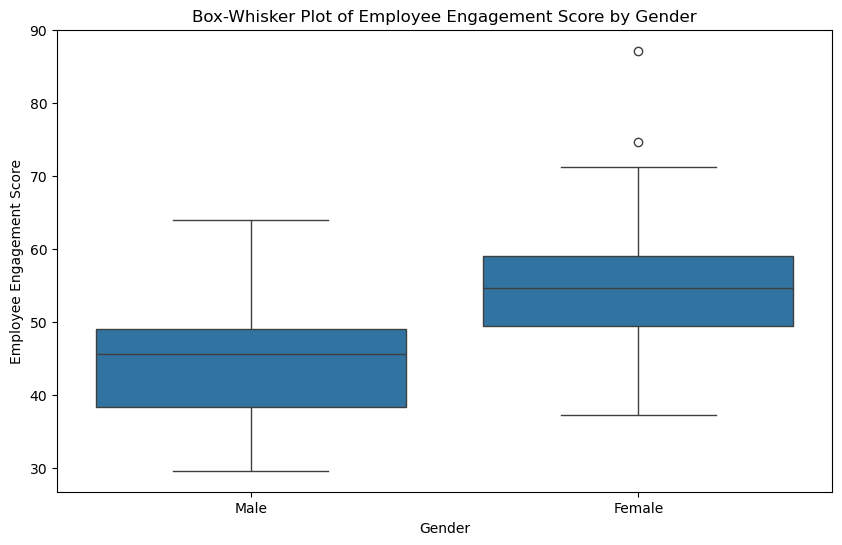

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='EES', data=df)
plt.title('Box-Whisker Plot of Employee Engagement Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Employee Engagement Score')
plt.show()

* Median (50%): The line inside the box.
* Interquartile range (IQR - Spread): The "length" between Q1 and the Q3. The height of the box.
* Range, Outliers: The difference between the highest and lowest values. The "whiskers".
* Skewness: The shift (close to top or bottom) of the median around the height of the box.

**Interpretation**:

The boxplot shows that the median "Employee Engagement Score" is higher for female employees if compared with male employees.

The female distribution is symmetric and looks like a normal one (bell curve shape).

The male is not symmetric and doesn't look like a normal distribution:
* has a long tail to the right with higher values of engagement score.
* has a short tail to the left with lower values of engagement score.
* into the middle of the 50% (the box) we could see it is right skewed.

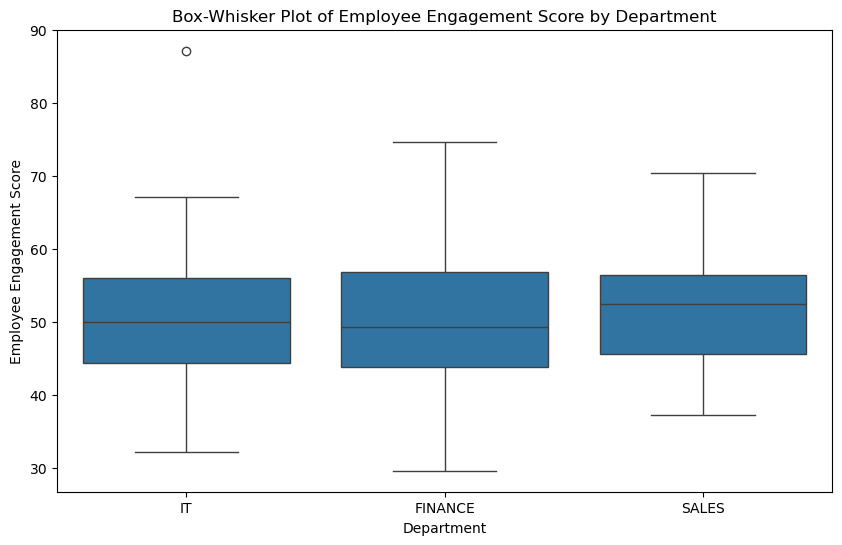

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='DEPT', y='EES', data=df)
plt.title('Box-Whisker Plot of Employee Engagement Score by Department')
plt.xlabel('Department')
plt.ylabel('Employee Engagement Score')
plt.show()

**Interpretation**:

* IT: sounds symmetric and could be a normal distribution.
* FINANCE: it is left skewed.
* SALES: there is no straight conclusion about the distribution, however, its behavior is pretty close with the male distribution taken from Gender X Employment Score made above.

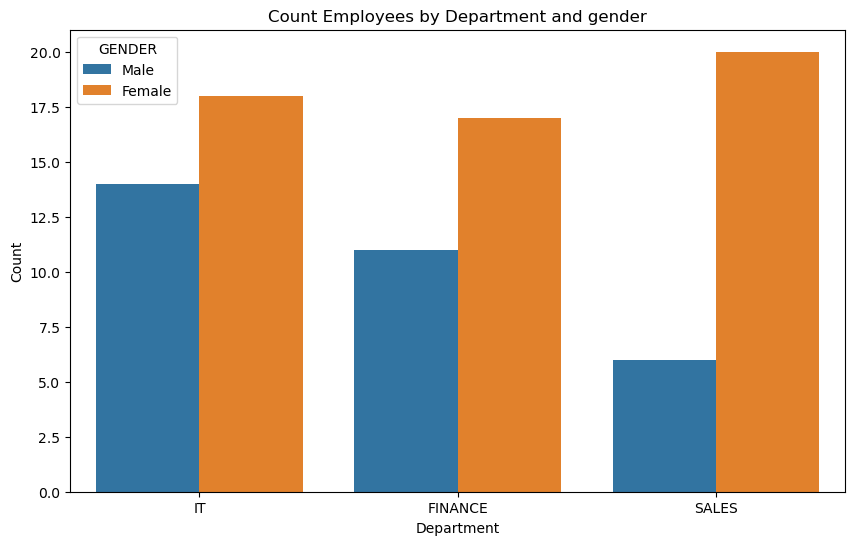

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='DEPT', hue='GENDER', data=df)
plt.title('Count Employees by Department and gender')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

I was inclined to say that we had a strong relationship between SALES department and MALE employees. However, the SALES department is majority female employees. And that should not be the case.

In [72]:
def summary_stats(data_frame, against: str, groups: list[str]):
    summary_df = data_frame.groupby(groups)[against].agg(["count", "mean", "std"])
    total = sum(summary_df['count'])
    summary_df['percentage'] = (summary_df['count'] / total) * 100
    summary_df['percentage'] = summary_df['percentage'].round(2)
    summary_df['cv'] = summary_df['std'] / summary_df['mean']
    summary_df = summary_df[['count', 'percentage', 'mean', 'std', 'cv']]
    return summary_df.rename(columns={'count': 'n', 'percentage': '%', 'mean': 'mean', 'std': 'standard deviation', 'cv': 'coefficient of variation'})

summary_stats(df, 'EES', ['GENDER', 'DEPT'])

n      %       mean  standard deviation  \
GENDER DEPT                                                
Female FINANCE  17  19.77  56.525294            8.426836   
       IT       18  20.93  53.426667           11.126338   
       SALES    20  23.26  55.303000            8.847113   
Male   FINANCE  11  12.79  40.139091            5.911143   
       IT       14  16.28  48.128571            8.587525   
       SALES     6   6.98  45.606667            5.198652   

                coefficient of variation  
GENDER DEPT                               
Female FINANCE                  0.149081  
       IT                       0.208254  
       SALES                    0.159975  
Male   FINANCE                  0.147266  
       IT                       0.178429  
       SALES                    0.113989

In [73]:
summary_stats(df, 'EES', ['DEPT'])

,n,%,mean,standard deviation,coefficient of variation
DEPT,,,,,
FINANCE,28,32.56,50.087857,11.019929,0.220012
IT,32,37.21,51.108750,10.292910,0.201392
SALES,26,30.23,53.065385,9.069112,0.170904


The mean are pretty close to each other, and they have the same coefficient of variation which means they are spread internally in the same way. We could say that the average EES is the same for all departments.

In [74]:
from scipy.stats import f_oneway
departments = {dept for dept in df['DEPT']}
ees_dept_groups = [df[df['DEPT'] == dept]['EES'] for dept in departments]
f_stat, p_value = f_oneway(*ees_dept_groups)
print(f"One-Way ANOVA: F-statistic: {f_stat:.4f}; P-value: {p_value:.4f};")

One-Way ANOVA: F-statistic: 0.5920; P-value: 0.5556;


Using ANOVA:
* Null Hypothesis ($H_0$): All groups have the same mean.
* Alternative Hypothesis ($H_1$): At least one group has a different mean.

We grouped data by department and took EES values regarding each group. Running ANOVA, the P-Value > 0.05 which means we cannot reject $H_0$. We could infer that is a high probability that EES average could be the same for all departments.

In [75]:
summary_stats(df, 'FEEDBACK', ['GENDER'])

,n,%,mean,standard deviation,coefficient of variation
GENDER,,,,,
Female,55,63.95,2.963636,0.815671,0.275227
Male,31,36.05,3.000000,0.856349,0.285450


In [76]:
summary_stats(df, 'EES', ['FEEDBACK'])

,n,%,mean,standard deviation,coefficient of variation
FEEDBACK,,,,,
1,3,3.49,51.670000,15.843447,0.306628
2,21,24.42,51.413333,7.301081,0.142008
3,37,43.02,51.202703,12.402895,0.242231
4,25,29.07,51.538000,8.251609,0.160107
